In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [17]:
# 1. 데이터 불러오기
df = pd.read_csv("D:/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
# 2. 독립변수 / 종속변수 분리
X = df.drop("Outcome", axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
y = df["Outcome"].astype("float32")  # 회귀니까 실수형으로
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float32

In [20]:
# 3. 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
# 4. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [22]:
# 5. 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

In [23]:
# 6. DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 8]),
 torch.Size([154, 8]),
 torch.Size([614, 1]),
 torch.Size([154, 1]))

In [24]:
# 7. 회귀 모델 정의
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)  # 회귀는 출력 1개
        )
        
    def forward(self, x):
        return self.model(x)

model = RegressionModel()


In [25]:
# 8. 손실함수 & 옵티마이저(최적화 함수) 정의
criterion = nn.MSELoss()  # 평균 제곱 오차
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [26]:
# 9. 학습 루프
train_losses = []

for epoch in range(100):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_dataloader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/100, Loss: {avg_loss:.4f}")

Epoch 1/100, Loss: 0.2015
Epoch 2/100, Loss: 0.1689
Epoch 3/100, Loss: 0.1588
Epoch 4/100, Loss: 0.1651
Epoch 5/100, Loss: 0.1562
Epoch 6/100, Loss: 0.1526
Epoch 7/100, Loss: 0.1471
Epoch 8/100, Loss: 0.1418
Epoch 9/100, Loss: 0.1573
Epoch 10/100, Loss: 0.1442
Epoch 11/100, Loss: 0.1425
Epoch 12/100, Loss: 0.1382
Epoch 13/100, Loss: 0.1378
Epoch 14/100, Loss: 0.1302
Epoch 15/100, Loss: 0.1320
Epoch 16/100, Loss: 0.1315
Epoch 17/100, Loss: 0.1332
Epoch 18/100, Loss: 0.1276
Epoch 19/100, Loss: 0.1346
Epoch 20/100, Loss: 0.1259
Epoch 21/100, Loss: 0.1272
Epoch 22/100, Loss: 0.1296
Epoch 23/100, Loss: 0.1284
Epoch 24/100, Loss: 0.1193
Epoch 25/100, Loss: 0.1207
Epoch 26/100, Loss: 0.1202
Epoch 27/100, Loss: 0.1216
Epoch 28/100, Loss: 0.1140
Epoch 29/100, Loss: 0.1101
Epoch 30/100, Loss: 0.1120
Epoch 31/100, Loss: 0.1118
Epoch 32/100, Loss: 0.1097
Epoch 33/100, Loss: 0.1181
Epoch 34/100, Loss: 0.1054
Epoch 35/100, Loss: 0.1018
Epoch 36/100, Loss: 0.1062
Epoch 37/100, Loss: 0.1070
Epoch 38/1

In [27]:
# 10. 모델 평가
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze().numpy()
    actual = y_test.squeeze().numpy()
    mse = np.mean((predictions - actual) ** 2)
    print(f"\n📉 최종 MSE (Mean Squared Error): {mse:.4f}")


📉 최종 MSE (Mean Squared Error): 0.2399


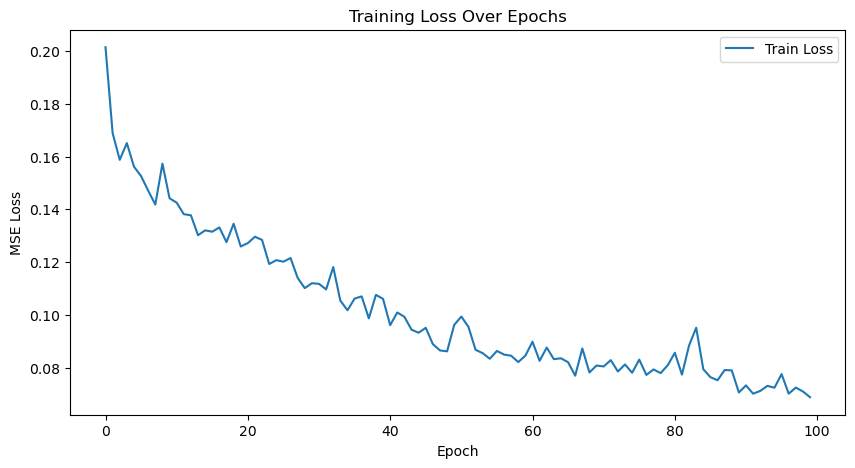

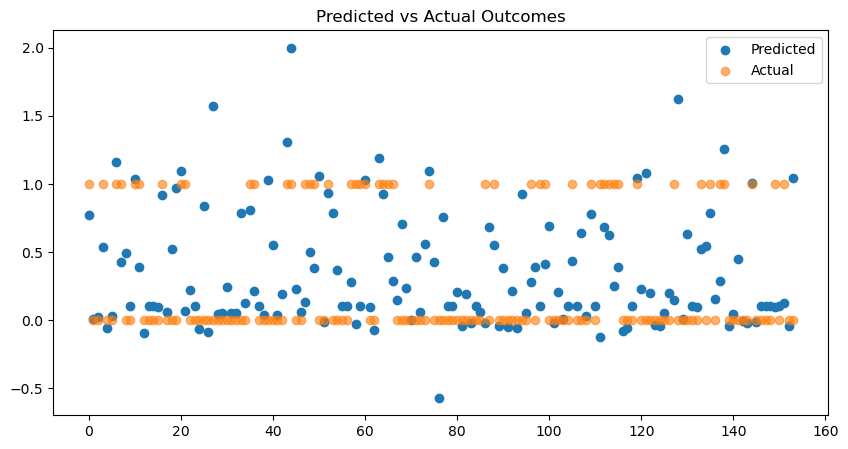

In [28]:
# 11. 시각화
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# 예측 vs 실제 그래프
plt.figure(figsize=(10,5))
plt.scatter(range(len(predictions)), predictions, label="Predicted")
plt.scatter(range(len(actual)), actual, label="Actual", alpha=0.6)
plt.title("Predicted vs Actual Outcomes")
plt.legend()
plt.show()